In [1]:
import os
os.chdir('../')

import matplotlib.pyplot as plt
import yaml

from utils.tb_vis_utils import gen_log_data, gen_expt_dict
from utils.ed_vis_utils import load_data, vis_within_episode_performance
from utils.vis_utils import plot_learning_curves, plot_learning_curves_all, \
    get_ood_gen_scores, plot_ood_gen_scores, \
    plot_mm_selfplay_scores, get_selfplay_scores, vis_nk_curve_all

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [9]:
baselines_dict = { # these were computed in summarize_nk_eval.ipynb
    # mean, 95% CI
    "mpe-pp": {
        "POAM-AHT": [9.118, 1.068],
        "Naive MARL": [4.350, 1.255] # qmix 
    },
    "5v6": {
        "POAM-AHT": [11.114, 0.527],
        "Naive MARL": [11.101, 0.565] # qmix
    },
    "8v9": {
        "POAM-AHT": [14.272, 0.450],
        "Naive MARL": [16.828, 0.385]  # qmix
    },
    "10v11": {
        "POAM-AHT": [15.869, 0.308], 
        "Naive MARL": [18.282, 0.199] # qmix
    },
    "3sv5z": {
        "POAM-AHT": [19.139, 0.480],
        "Naive MARL": [13.798, 1.542] # qmix
    },
}

# read user info from config/user_info.yaml
with open('config/user_info.yaml') as f:
    user_info = yaml.load(f, Loader=yaml.FullLoader)
BASE_RES_PATH = user_info['base_results_path']
STAT_NAME = "test_return_mean"

## Core Results

In [ ]:
# Main sample efficiency result

# POAM vs PPO only during open training with IPPO, QMIX, VDN, MAPPO, IQL teammates
all_exp_dict = {}
for task in [
    "mpe-pp/ts=100_shape=0.01",
    "5v6",
    "8v9",
    "3sv5z",
    "10v11"
    ]:
    base_path = os.path.join(BASE_RES_PATH, task, "open_train")
    expt_paths = {# display_name: basename_regex, folder name
            "POAM": ("poam_baseline_seed=*", "poam-pqvmq_open"),
            "IPPO-NAHT": ("ippo_baseline_seed=*", "ippo-pqvmq_open"),
    }
    experiments_open = gen_expt_dict(expt_paths, base_path=base_path)

    # plot  results
    all_exp_dict[task] = gen_log_data(experiments_open, stat_name=STAT_NAME, smooth=True, smooth_window=5)

Saving to ../../open_marl_results/figures/5trials-95ci/open-pqvmq.pdf


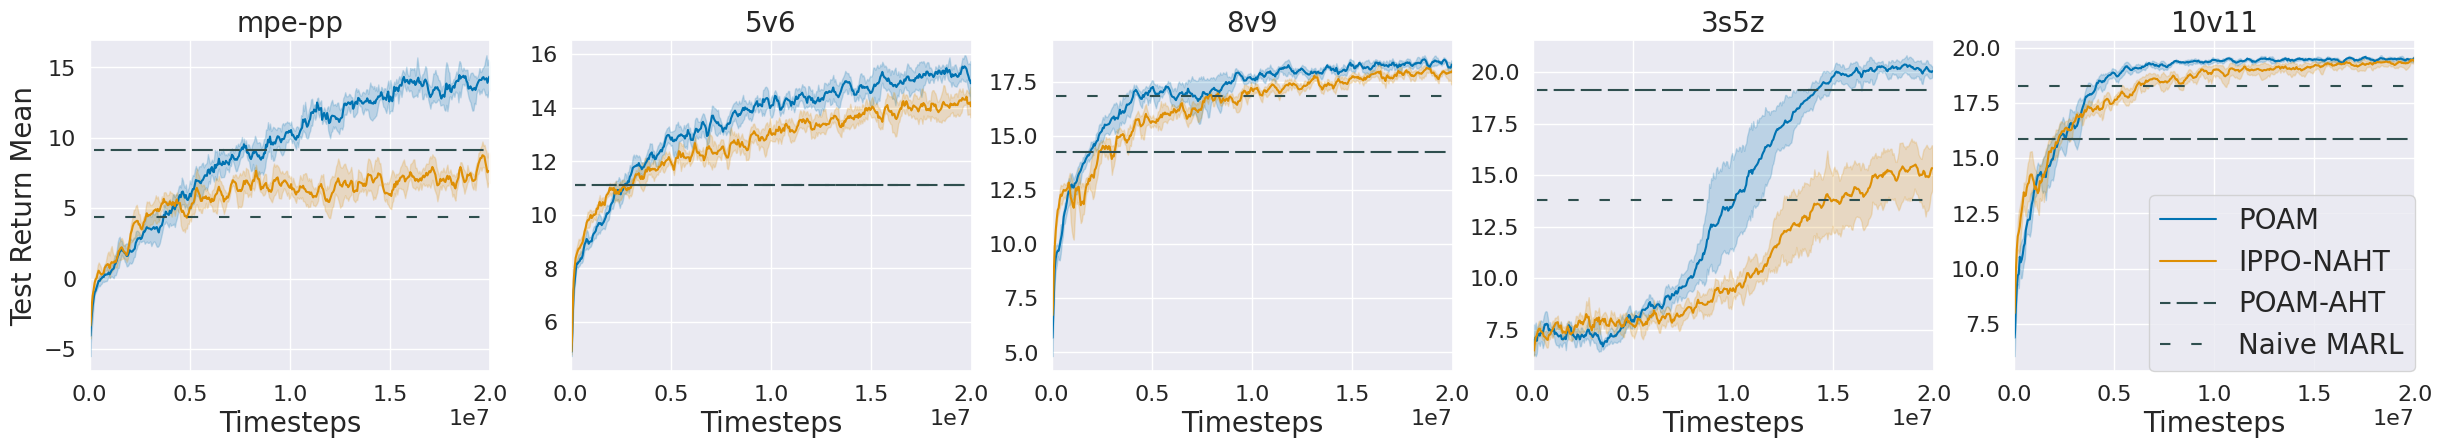

In [7]:
plot_learning_curves_all(all_exp_dict, 
        stat_name=STAT_NAME,
        plot_suptitle=None,
        savename=f"open-pqvmq",
        legend_cols=1,
        legend_loc=(0., -0.5),
        baselines=baselines_dict,
        xaxis_lims=(0, 20000000),
        save=False,
        savedir="figures/5trials-95ci"
)

## MPE Results

In [ ]:
# mpe main result
BASELINES = {
    "mpe-spread": None,
    "mpe-pp": {
        "POAM-AHT": [9.525, 3.431],
        "Naive MARL": [4.468, 3.838] # vdn 
    }
}

# POAM vs PPO only during open training with IPPO, QMIX, VDN, MAPPO, IQL teammates
all_exp_dict = {}
for task in [
    "mpe-pp"
    ]:
    base_path = os.path.join(BASE_RES_PATH, task, "ts=100_shape=0.01/open_train")
    expt_paths = {# display_name: basename_regex, folder name
            "POAM": ("poam_baseline_seed=*", "poam-pqvmq_open"),
            "IPPO-NAHT": ("ippo_baseline_seed=*", "ippo-pqvmq_open"),
    }
    experiments_open = gen_expt_dict(expt_paths, base_path=base_path)
    all_exp_dict[task] = gen_log_data(experiments_open, stat_name=STAT_NAME, smooth=True, smooth_window=5)

Saving to ../../open_marl_results/figures/5trials-95ci/mpe-pp_open-pqvmq.pdf


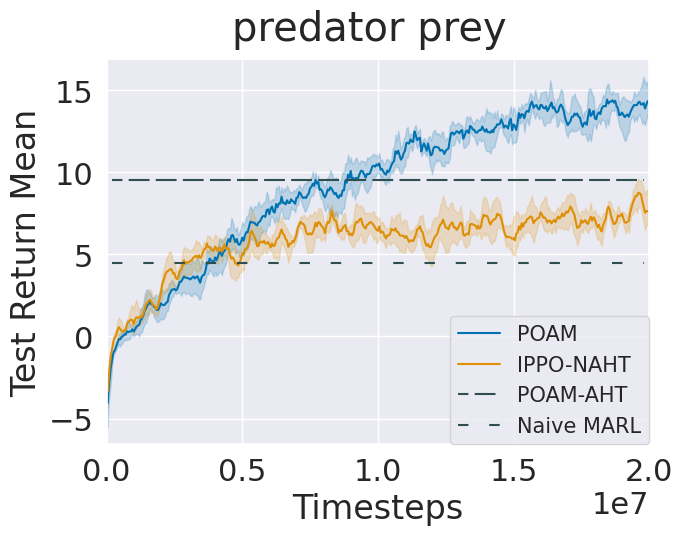

In [9]:
plot_learning_curves_all(all_exp_dict, 
            stat_name=STAT_NAME,
            plot_suptitle='predator prey',
            show_subplot_task_name=False,
            savename=f"mpe-pp_open-pqvmq",
            legend_cols=1,
            legend_loc=(0., -0.5),
            baselines=BASELINES,
            xaxis_lims=(0, 20000000),
            save=False,
            savedir="figures/5trials-95ci"
    )

dict_keys(['25600', '1049600', '2073600', '3097600', '4121600', '5145600', '6169600', '7193600', '8217600', '9241600', '10265600', '11289600', '12313600', '13337600', '14361600', '15385600', '16409600', '17433600', '18457600', '19481600'])


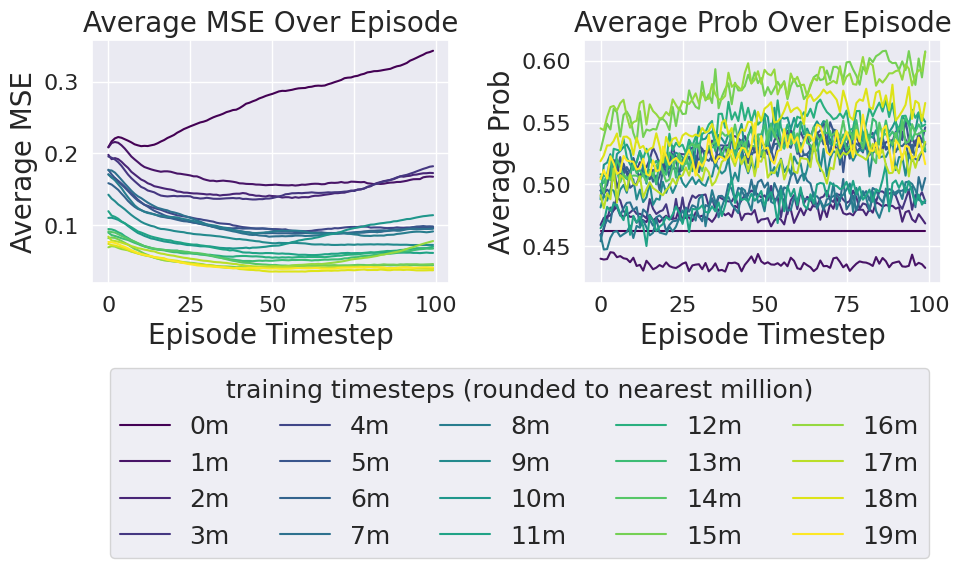

In [12]:
# MPE-PP visualization of within-episode performance of POAM
task_name = "mpe-pp/ts=100_shape=0.01"
folder_name = "open_train/poam-pqvmq_open"
expt_name = "poam_data-gathering_seed=112358_05-19-00-09-17"
expt_datapath = os.path.join(BASE_RES_PATH, task_name, folder_name, "data", expt_name)

data, train_ts_list = load_data(expt_datapath, old_format=False)
vis_within_episode_performance(data, train_ts_list,
                               save=False,
                               smooth=False,
                               savedir="figures/neurips", 
                               task="mpe-pp"
                               )

{'POAM': ['/scratch/cluster/clw4542/explore_marl/open_marl_results/mpe-pp/ts=100_shape=0.01/open_train/liam-pqvmq_open/tb_logs/liam_ppo_baseline_seed=1285842_05-14-12-07-07', '/scratch/cluster/clw4542/explore_marl/open_marl_results/mpe-pp/ts=100_shape=0.01/open_train/liam-pqvmq_open/tb_logs/liam_ppo_baseline_seed=112358_05-14-12-07-07', '/scratch/cluster/clw4542/explore_marl/open_marl_results/mpe-pp/ts=100_shape=0.01/open_train/liam-pqvmq_open/tb_logs/liam_ppo_baseline_seed=78590_05-14-12-07-07', '/scratch/cluster/clw4542/explore_marl/open_marl_results/mpe-pp/ts=100_shape=0.01/open_train/liam-pqvmq_open/tb_logs/liam_ppo_baseline_seed=38410_06-25-12-13-22', '/scratch/cluster/clw4542/explore_marl/open_marl_results/mpe-pp/ts=100_shape=0.01/open_train/liam-pqvmq_open/tb_logs/liam_ppo_baseline_seed=93718_06-25-12-13-22'], 'POAM w/o UCD': ['/scratch/cluster/clw4542/explore_marl/open_marl_results/mpe-pp/ts=100_shape=0.01/open_train/liam-cmask-pqvmq_open/tb_logs/liam_ppo_baseline_seed=78590_05

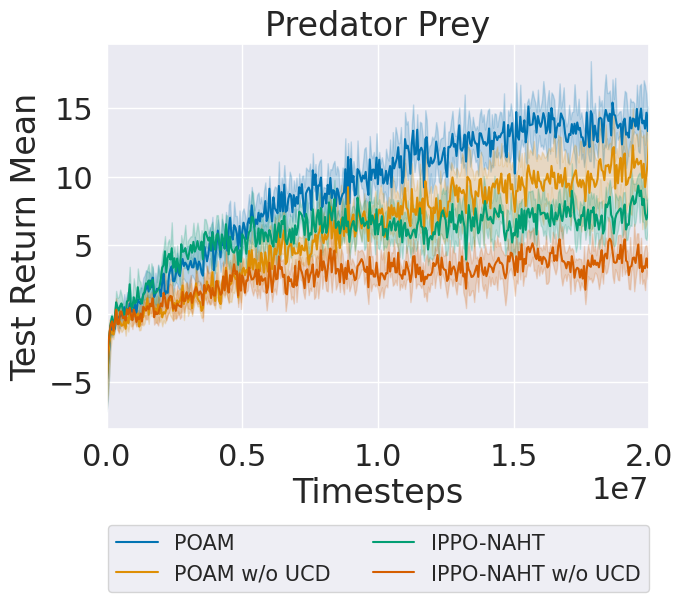

In [10]:
# mpe-pp ablation of training with and without critic masking
TASK = "mpe-pp"
STAT_NAME = "test_return_mean"

# POAM vs PPO only during open training with IPPO, QMIX, VDN, MAPPO, IQL teammates
base_path = os.path.join(BASE_RES_PATH, TASK, "ts=100_shape=0.01", "open_train")
expt_paths = {# display_name: basename_regex, folder name
         "POAM": ("poam_baseline_seed=*", "poam-pqvmq_open"),
         "POAM w/o UCD": ("poam_baseline_seed=*", "poam-cmask-pqvmq_open"),
         "IPPO-NAHT": ("ippo_baseline_seed=*", "ippo-pqvmq_open"),
         "IPPO-NAHT w/o UCD": ("ippo_baseline_seed=*", "ippo-cmask-pqvmq_open"),
}
experiments_open = gen_expt_dict(expt_paths, base_path=BASE_RES_PATH)
# plot  results
exp_dfs = gen_log_data(experiments_open, stat_name=STAT_NAME)

# exp_dfs
plot_learning_curves(exp_dfs, 
                stat_name=STAT_NAME,
                plot_title='Predator Prey',
                savename=f"{TASK}_open-pqvmq_critic-masking-ablation",
                legend_cols=2,
                xaxis_lims=(0, 20000000),
#                  yaxis_lims=(-0.05, 1.05),
                save=False,
                savedir="figures/5trials-95ci"
            )

In [ ]:
# mpe-pp ood generalization result
exp_namemap = { # format is alg log name: display name
        "ippo-pqvmq_open": "IPPO-NAHT",
        "poam-pqvmq_open": "POAM",
}

target_algs = [        
    "vdn", 
    "qmix",
    "iql",
    "ippo", 
    "mappo", 
]

ood_results = {}
id_baselines = {}
for task, algs_to_eval in {
    "mpe-pp": ["ippo-pqvmq_open", "poam-pqvmq_open"], 
}.items():
    print("Setting: ", task)
    n_agents = 3
    n_eval_alg_seeds = 5
    n_target_alg_seeds = 4
    ood_gen_means, ood_gen_cis = get_ood_gen_scores(log_path=os.path.join(BASE_RES_PATH, task, "ts=100_shape=0.01", "ood_generalization"), 
                                    algs_to_eval=algs_to_eval,
                                    target_algs=target_algs,
                                    n_expected_evals=n_eval_alg_seeds * n_target_alg_seeds  * (n_agents - 1), 
                                    remove_empty_evals=False,
                                    remove_duplicates=False
                                    )
    ood_results[task] = (ood_gen_means, ood_gen_cis)
    # get in-distribution performances 
    id_means, _ = get_ood_gen_scores(log_path=os.path.join(BASE_RES_PATH, task, "ts=100_shape=0.01", "in_distr_eval"), 
                                    algs_to_eval=algs_to_eval,
                                    target_algs=target_algs,
                                    n_expected_evals=n_eval_alg_seeds * 1 * (n_agents - 1),
                                    remove_empty_evals=False,
                                    remove_duplicates=False
                                    )
    id_baselines[task] = id_means

num subfigs 1


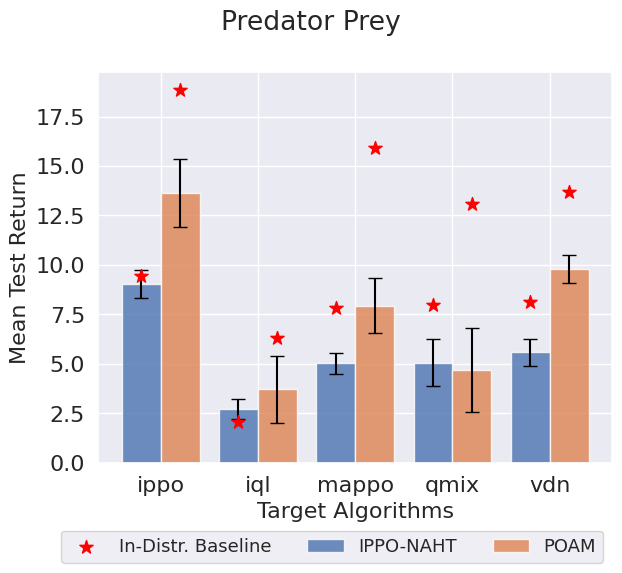

In [22]:
plot_ood_gen_scores(ood_results, exp_namemap, 
                    in_distr_baseline=id_baselines,
                    plot_suptitle="Predator Prey",
                    plot_subplot_titles=False,
                    save=False, 
                    savedir="figures/5trials-95ci", 
                    savename="mpe-pp_open-pqvmq_ood_gen-id-baseline.pdf"
)


## Appendix Results

### Supplemental Results on 5v6

{'POAM': ['/scratch/cluster/clw4542/explore_marl/open_marl_results/5v6/open_train/liam-pqvmq_open/tb_logs/liam_ppo_baseline_seed=1285842_02-08-11-35-41', '/scratch/cluster/clw4542/explore_marl/open_marl_results/5v6/open_train/liam-pqvmq_open/tb_logs/liam_ppo_baseline_seed=112358_02-08-11-35-41', '/scratch/cluster/clw4542/explore_marl/open_marl_results/5v6/open_train/liam-pqvmq_open/tb_logs/liam_ppo_baseline_seed=78590_02-08-11-35-41', '/scratch/cluster/clw4542/explore_marl/open_marl_results/5v6/open_train/liam-pqvmq_open/tb_logs/liam_ppo_baseline_seed=38410_07-08-14-19-20', '/scratch/cluster/clw4542/explore_marl/open_marl_results/5v6/open_train/liam-pqvmq_open/tb_logs/liam_ppo_baseline_seed=93718_07-08-14-19-20'], 'POAM w/o UCD': ['/scratch/cluster/clw4542/explore_marl/open_marl_results/5v6/open_train/liam-cmask-pqvmq_open/tb_logs/liam_ppo_baseline_seed=78590_02-01-10-24-40', '/scratch/cluster/clw4542/explore_marl/open_marl_results/5v6/open_train/liam-cmask-pqvmq_open/tb_logs/liam_ppo_

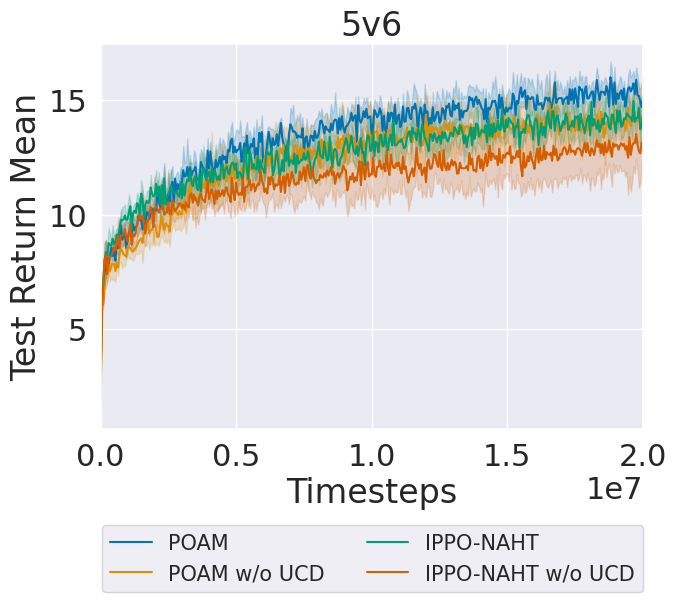

In [11]:
# 5v6 ablation with cmask
TASK = "5v6"
STAT_NAME = "test_return_mean"

# POAM vs PPO only during open training with IPPO, QMIX, VDN, MAPPO, IQL teammates
base_path = os.path.join(BASE_RES_PATH, TASK, "open_train")
expt_paths = {# display_name: basename_regex, folder name
         "POAM": ("poam_baseline_seed=*", "poam-pqvmq_open"),
         "POAM w/o UCD": ("poam_baseline_seed=*", "poam-cmask-pqvmq_open"),
         "IPPO-NAHT": ("ippo_baseline_seed=*", "ippo-pqvmq_open"),
         "IPPO-NAHT w/o UCD": ("ippo_baseline_seed=*", "ippo-cmask-pqvmq_open"),
}
experiments_open = gen_expt_dict(expt_paths, base_path=base_path)

# plot  results
exp_dfs = gen_log_data(experiments_open, stat_name=STAT_NAME)

# exp_dfs
plot_learning_curves(exp_dfs, 
                stat_name=STAT_NAME,
                plot_title=TASK,
                savename=f"{TASK}_open-pqvmq_critic-masking-ablation",
                legend_cols=2,
                xaxis_lims=(0, 20000000),
#                  yaxis_lims=(-0.05, 1.05),
                save=False,
                savedir="figures/5trials-95ci"
            )

dict_keys(['6710', '2010835', '4014645', '6016009', '8017899', '10023002', '12023066', '14027075', '16027419', '18028505'])


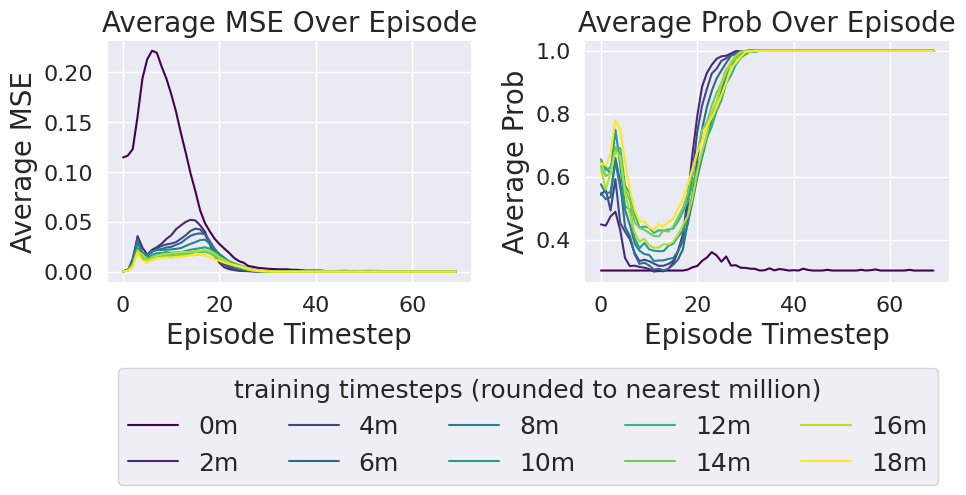

In [13]:
# 5v6 visualization of within-episode performance of POAM
task_name = "5v6"
folder_name = "open_train/poam-pqvmq_open"
expt_name = "poam_data-gathering_seed=112358_03-01-16-57-44"
expt_datapath = os.path.join(BASE_RES_PATH, task_name, folder_name, "data", expt_name)

data, train_ts_list = load_data(expt_datapath, old_format=False)
vis_within_episode_performance(data, train_ts_list,
                               save=False,
                               savedir="figures/neurips", 
                               task="5v6"
                               )

In [ ]:
# sc2 ood generalization result
exp_namemap = { # format is alg log name: display name
        "ippo-pqvmq_open": "IPPO-NAHT",
        "poam-pqvmq_open": "POAM",
}

target_algs = [        
    "vdn", 
    "qmix",
    "iql",
    "ippo", 
    "mappo", 
]


ood_results = {}
id_baselines = {}

n_eval_alg_seeds = 5
n_target_alg_seeds = 4

ood_results = {}
for task, algs_to_eval in {
    "5v6": ["ippo-pqvmq_open", "poam-pqvmq_open"], # all done
    "8v9": ["ippo-pqvmq_open", "poam-pqvmq_open"], # all done
    "3sv5z": ["ippo-pqvmq_open", "poam-pqvmq_open"], # all done
    "10v11": ["ippo-pqvmq_open", "poam-pqvmq_open"] # all done
}.items():
    print("Setting: ", task)
    # determine the number of agents from the task name. take the 
    # first part of task name until the first letter
    n_agents = int(task.split('v')[0].split('s')[0])
    ood_gen_means, ood_gen_cis = get_ood_gen_scores(log_path=os.path.join(BASE_RES_PATH, task, "ood_generalization"), 
                                    algs_to_eval=algs_to_eval,
                                    target_algs=target_algs,
                                    n_expected_evals=n_eval_alg_seeds* n_target_alg_seeds * (n_agents - 1),
                                    remove_empty_evals=True,
                                    remove_duplicates=True
                                    )
    ood_results[task] = (ood_gen_means, ood_gen_cis)

    # get in-distribution performances 
    id_means, _ = get_ood_gen_scores(log_path=os.path.join(BASE_RES_PATH, task, "in_distr_eval"), 
                                    algs_to_eval=algs_to_eval,
                                    target_algs=target_algs,
                                    n_expected_evals=n_eval_alg_seeds * 1 * (n_agents - 1),
                                    remove_empty_evals=True,
                                    remove_duplicates=True
                                    )
    id_baselines[task] = id_means

num subfigs 4


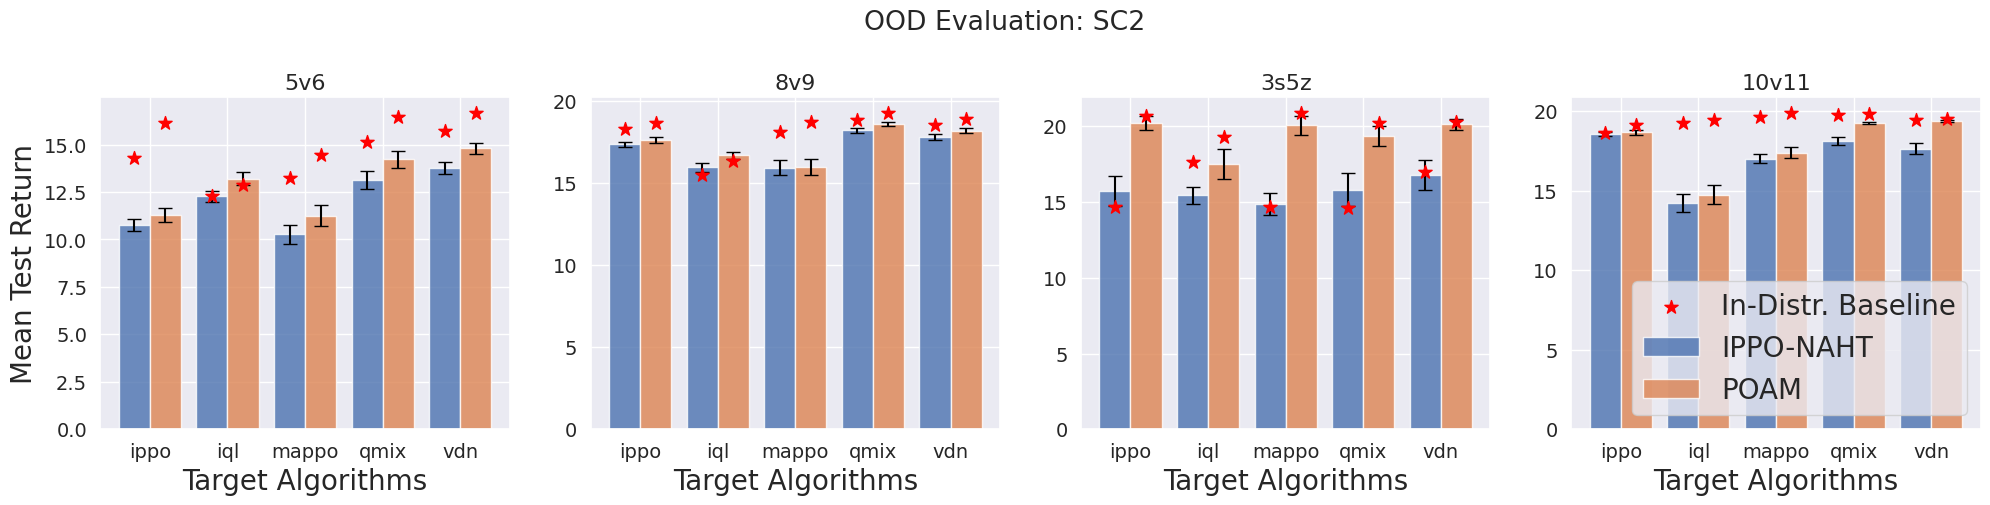

In [41]:
plot_ood_gen_scores(ood_results, exp_namemap, id_baselines, 
                    plot_suptitle="OOD Evaluation: SC2",
                    plot_subplot_titles=True,
                    save=False, 
                    savedir="figures/5trials-95ci", 
                    savename="sc2_open-pqvmq_ood_gen-id-baseline.pdf"
)

### Matched vs Mismatched Seeds

In [49]:
algorithms = [        
    "vdn", 
    "qmix",
    "iql",
    "ippo", 
    "mappo", 
]
n_runs = 5

mm_selfplay_results = {}
for task, n_agents in {
    "mpe-pp/ts=100_shape=0.01": 3,
    "5v6": 5,
    "8v9": 8,
    "3sv5z": 3,
    "10v11": 10
}.items():
    print("Setting: ", task)
    # 95% CIs
    sp_scores_matched_means, sp_scores_matched_cis = get_selfplay_scores(log_path=os.path.join(BASE_RES_PATH, task, "open_eval_best"), 
                                    algorithms=algorithms,
                                    n_expected_evals=n_runs*(n_agents - 1),
                                    remove_empty_evals=True,
                                    remove_duplicates=True,
                                    require_matched_seeds=True)
    sp_scores_mismatched_means, sp_scores_mismatched_cis  = get_selfplay_scores(log_path=os.path.join(BASE_RES_PATH, task, "selfplay_mismatched_eval_best"),
                                    algorithms=algorithms,
                                    n_expected_evals=n_runs*(n_agents - 1),
                                    remove_empty_evals=True,
                                    remove_duplicates=True,
                                    require_matched_seeds=False)
    mm_selfplay_results[task.split('/')[0]] = {
        "matched": {"mean": sp_scores_matched_means, "ci": sp_scores_matched_cis},
        "mismatched": {"mean": sp_scores_mismatched_means, "ci": sp_scores_mismatched_cis}
    }

Setting:  mpe-pp/ts=100_shape=0.01
Setting:  5v6
Setting:  8v9
Setting:  3s5z
Setting:  10v11


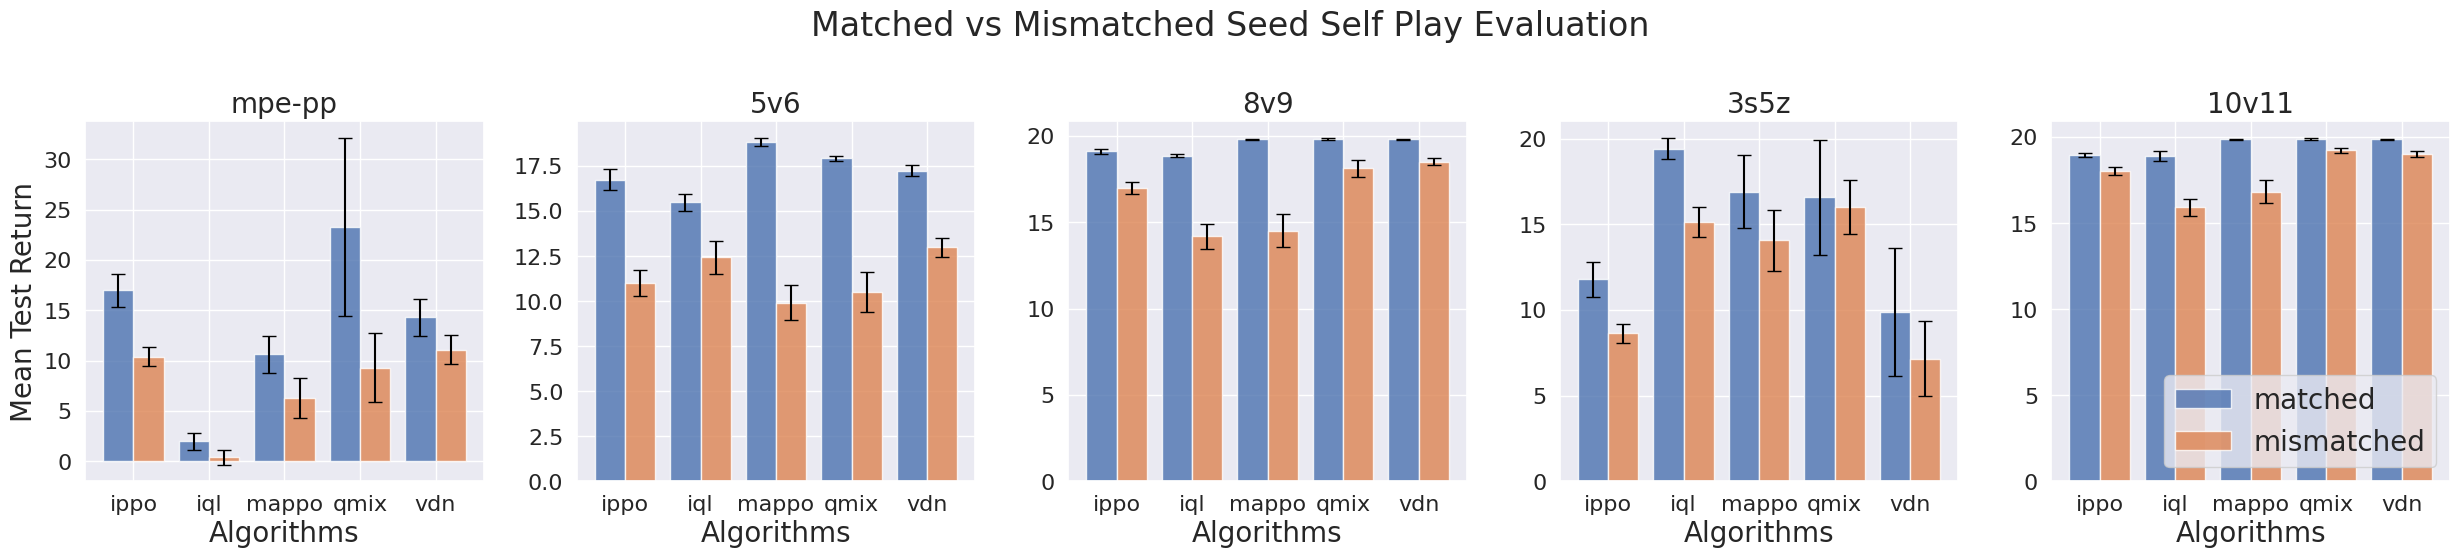

In [51]:
plot_mm_selfplay_scores(mm_selfplay_results, 
                    save=False, 
                    savedir="figures/5trials-95ci", 
                    savename="mm-selfplay.pdf"
)

### Alternative OOD Evaluation

In this experiment on MPE, we train POAM and IPPO-AHT on QMIX , MAPPO, and IQL w/seeds 112358, 1285842, 38410 (selected for minimum and maximum competencies). We will evaluate on all IPPO and VDN seeds. 

Setting:  mpe-pp
Setting:  5v6
Setting:  8v9
Setting:  10v11
Setting:  3s5z


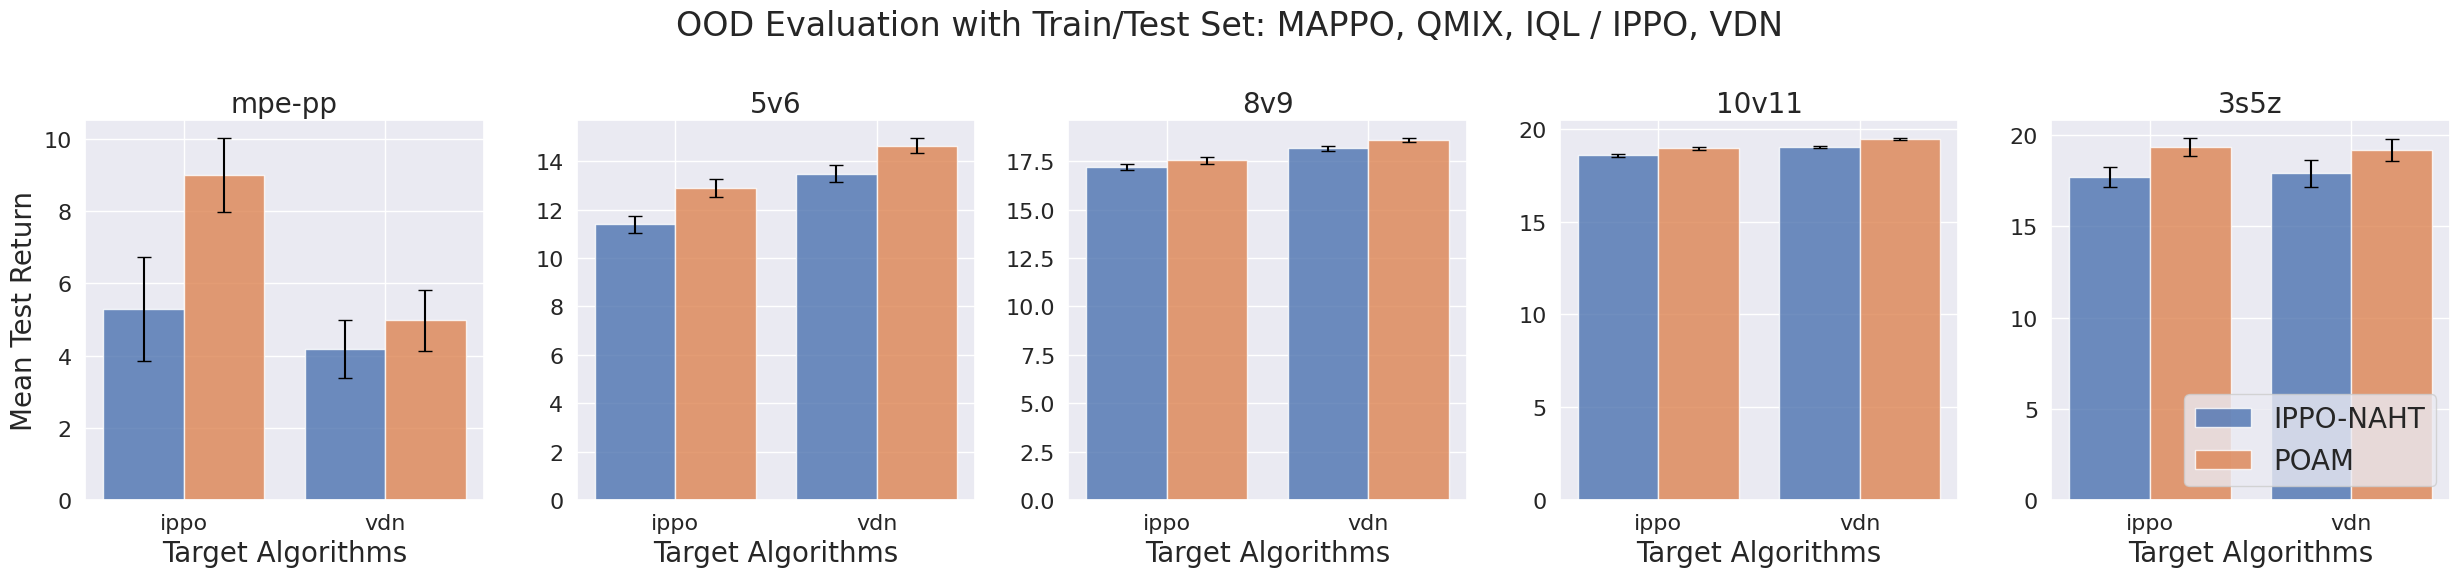

In [52]:
# ood generalization result - alt train/test split
exp_namemap = { # format is alg log name: display name
        "ippo-qmq-3trainseeds": "IPPO-NAHT",
        "poam-qmq-3trainseeds": "POAM",
}

target_algs = [        
    "vdn", 
    "ippo", 
]

n_eval_alg_seeds = 5
n_target_alg_seeds = 5


ood_results = {}
id_baselines = {}
for task_dir, (algs_to_eval, n_agents) in {
    "mpe-pp/ts=100_shape=0.01": (["ippo-qmq-3trainseeds", "poam-qmq-3trainseeds"], 3), 
    "5v6": (["ippo-qmq-3trainseeds", "poam-qmq-3trainseeds"], 5),
    "8v9": (["ippo-qmq-3trainseeds", "poam-qmq-3trainseeds"], 8),
    "10v11": (["ippo-qmq-3trainseeds", "poam-qmq-3trainseeds"], 10),
    "3sv5z": (["ippo-qmq-3trainseeds", "poam-qmq-3trainseeds"], 3),
}.items():
    task = task_dir.split("/")[0]
    print("Setting: ", task)
    ood_gen_means, ood_gen_cis = get_ood_gen_scores(log_path=os.path.join(BASE_RES_PATH, task_dir, "ood_gen_vp"), 
                                    algs_to_eval=algs_to_eval,
                                    target_algs=target_algs,
                                    n_expected_evals=n_eval_alg_seeds * n_target_alg_seeds  * (n_agents - 1), 
                                    remove_empty_evals=False,
                                    remove_duplicates=False
                                    )
    ood_results[task] = (ood_gen_means, ood_gen_cis)

plot_ood_gen_scores(ood_results, exp_namemap, 
                    plot_suptitle=f"OOD Evaluation with Train/Test Set: MAPPO, QMIX, IQL / IPPO, VDN",
                    plot_subplot_titles=True,
                    save=False, 
                    savedir="figures/5trials-95ci", 
                    savename="open-qmq_ood.pdf"
)


### NAHT vs AHT 

We wish to evaluate the performance of POAM vs POAM-AHT, to compare their performances on the N=1 case, where N is the number of controlled agents. 

Both POAM and POAM-AHT are evaluated with the nk cross-play evaluation, where the evaluation samples from all 5 possible teammate seeds.

Please note that the error bars are 95% CI's computed across the mean scores against each opponent type (VDN, QMIX, IPPO, MAPPO).
The highest value of N reflects the self-play setting and is displayed as a horizontal line


/scratch/cluster/clw4542/explore_marl/open-marl/src/utils/vis_utils.py:490: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  in_distr_baseline:dict=None,


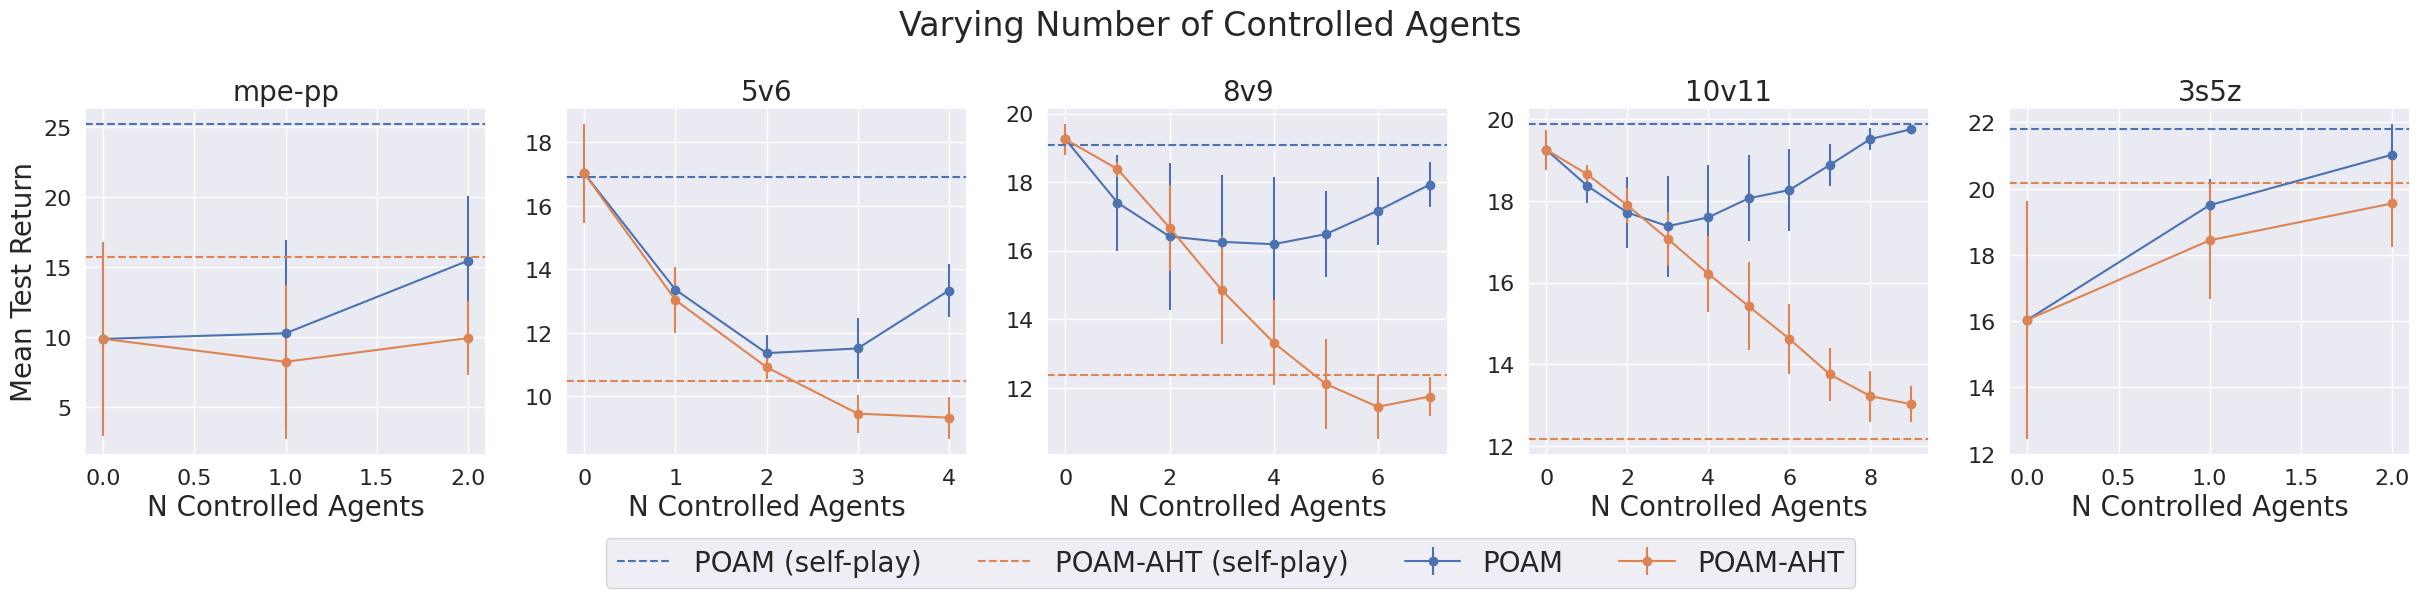

In [54]:
target_algs = {  # log_name: display_name      
    "vdn": "vdn", 
    "qmix": "qmix",
    "iql": "iql",
    "ippo": "ippo", 
    "mappo": "mappo", 
}

eval_algs = {
    # log_name: display_name
    'liam-pqvmq_open': "POAM",
    'liam-pqvmq_aht': "POAM-AHT",
}

tasks = {
    "mpe-pp/ts=100_shape=0.01": 3,
    "5v6": 5,
    "8v9": 8,
    "10v11": 10,
    "3sv5z": 3,
}

print("Please note that the error bars are 95% CI's computed across the mean scores against each opponent type (VDN, QMIX, IPPO, MAPPO).")
print("The highest value of N reflects the self-play setting and is displayed as a horizontal line")
vis_nk_curve_all(tasks=tasks, base_path=BASE_RES_PATH,
                 eval_algs=eval_algs, target_algs=target_algs, 
                 plot_n_controlled=True,
                 save=False, 
                 savedir="figures/5trials-95ci",
                 savename="nk_mean_curves.pdf")

## Cross Play Tables

In [16]:
from utils.vis_utils import vis_cross_play_matrix

base_path = "/scratch/cluster/clw4542/explore_marl/open_marl_results/"
algorithms = {       
    "vdn": "vdn", 
    "qmix": "qmix",
    "iql": "iql",
    "ippo": "ippo", 
    "mappo": "mappo", 
    "poam-pqvmq_aht": "poam-aht",
}

n_runs = 5
for log_folder, n_agents in {
    "mpe-pp/ts=100_shape=0.01": 3, 
    "5v6": 5, 
    "8v9": 8, 
    "10v11": 10,
    "3sv5z": 3,
}.items():
    print("Setting: ", log_folder)
    df = vis_cross_play_matrix(log_path=os.path.join(BASE_RES_PATH, log_folder, "open_eval_best"), 
                               algorithms=algorithms,
                               # algs to compute the xp score with
                               eval_algs=["vdn", "qmix", "iql", "ippo", "mappo"], # TODO: enable specifying the seed of teammate as well
                               n_expected_evals=n_runs*(n_agents - 1),
                               vis_table_colors=True,
                               rm_empty_evals=False,
                               rm_duplicates=False,
                               save=False,
                               savedir="figures/5trials-95ci",
                               savename=f"{log_folder.replace('/', '_')}_xp-matrix.png", 
                               verbose=True
                               )
    
    display(df)
print("Note: all scores are the mean +/- 95% CI")

Setting:  mpe-pp/ts=100_shape=0.01


,vdn,qmix,iql,ippo,mappo,poam-aht,mean xp score
vdn,14.305 +/- (1.844),8.657 +/- (2.925),4.423 +/- (1.677),2.374 +/- (0.730),1.912 +/- (1.394),8.101 +/- (1.164),4.342 +/- (1.244)
qmix,8.657 +/- (2.925),23.297 +/- (8.845),3.359 +/- (1.691),2.692 +/- (1.522),2.691 +/- (1.365),10.287 +/- (1.297),4.350 +/- (1.255)
iql,4.423 +/- (1.677),3.359 +/- (1.691),1.997 +/- (0.835),1.520 +/- (0.820),0.325 +/- (0.552),4.809 +/- (1.924),2.407 +/- (0.811)
ippo,2.374 +/- (0.730),2.692 +/- (1.522),1.520 +/- (0.820),16.974 +/- (1.621),8.776 +/- (1.244),13.584 +/- (1.412),3.840 +/- (1.056)
mappo,1.912 +/- (1.394),2.691 +/- (1.365),0.325 +/- (0.552),8.776 +/- (1.244),10.616 +/- (1.874),8.809 +/- (2.012),3.426 +/- (1.157)
poam-aht,8.101 +/- (1.164),10.287 +/- (1.297),4.809 +/- (1.924),13.584 +/- (1.412),8.809 +/- (2.012),15.727 +/- (1.290),9.118 +/- (1.068)


Setting:  5v6


,vdn,qmix,iql,ippo,mappo,poam-aht,mean xp score
vdn,17.239 +/- (0.315),12.164 +/- (1.142),11.851 +/- (0.988),9.437 +/- (0.955),8.791 +/- (0.786),11.521 +/- (1.278),10.561 +/- (0.585)
qmix,12.164 +/- (1.142),17.935 +/- (0.146),9.857 +/- (0.672),11.758 +/- (1.138),10.623 +/- (1.188),11.991 +/- (1.051),11.101 +/- (0.565)
iql,11.851 +/- (0.988),9.857 +/- (0.672),15.482 +/- (0.462),9.106 +/- (0.622),8.657 +/- (0.747),10.340 +/- (0.971),9.868 +/- (0.469)
ippo,9.437 +/- (0.955),11.758 +/- (1.138),9.106 +/- (0.622),16.737 +/- (0.587),11.168 +/- (0.878),11.373 +/- (1.154),10.367 +/- (0.520)
mappo,8.791 +/- (0.786),10.623 +/- (1.188),8.657 +/- (0.747),11.168 +/- (0.878),18.826 +/- (0.205),10.345 +/- (1.233),9.810 +/- (0.518)
poam-aht,11.521 +/- (1.278),11.991 +/- (1.051),10.340 +/- (0.971),11.373 +/- (1.154),10.345 +/- (1.233),10.502 +/- (0.585),11.114 +/- (0.527)


Setting:  8v9


,vdn,qmix,iql,ippo,mappo,poam-aht,mean xp score
vdn,19.788 +/- (0.036),18.631 +/- (0.207),15.520 +/- (0.838),16.899 +/- (0.571),14.999 +/- (0.952),14.330 +/- (1.002),16.512 +/- (0.422)
qmix,18.631 +/- (0.207),19.811 +/- (0.035),15.754 +/- (0.819),17.588 +/- (0.477),15.338 +/- (0.799),14.815 +/- (1.004),16.828 +/- (0.385)
iql,15.520 +/- (0.838),15.754 +/- (0.819),18.854 +/- (0.093),14.229 +/- (0.863),12.995 +/- (0.878),13.053 +/- (0.953),14.625 +/- (0.463)
ippo,16.899 +/- (0.571),17.588 +/- (0.477),14.229 +/- (0.863),19.093 +/- (0.163),15.390 +/- (0.825),15.197 +/- (0.922),16.027 +/- (0.413)
mappo,14.999 +/- (0.952),15.338 +/- (0.799),12.995 +/- (0.878),15.390 +/- (0.825),19.795 +/- (0.037),13.965 +/- (0.999),14.680 +/- (0.462)
poam-aht,14.330 +/- (1.002),14.815 +/- (1.004),13.053 +/- (0.953),15.197 +/- (0.922),13.965 +/- (0.999),12.370 +/- (0.469),14.272 +/- (0.450)


Setting:  10v11


,vdn,qmix,iql,ippo,mappo,poam-aht,mean xp score
vdn,19.868 +/- (0.021),18.980 +/- (0.260),18.276 +/- (0.274),18.638 +/- (0.197),16.453 +/- (0.864),16.328 +/- (0.714),18.087 +/- (0.280)
qmix,18.980 +/- (0.260),19.884 +/- (0.034),17.348 +/- (0.453),18.193 +/- (0.311),18.608 +/- (0.370),16.395 +/- (0.684),18.282 +/- (0.199)
iql,18.276 +/- (0.274),17.348 +/- (0.453),18.901 +/- (0.279),16.610 +/- (0.547),16.206 +/- (0.692),14.826 +/- (0.650),17.110 +/- (0.282)
ippo,18.638 +/- (0.197),18.193 +/- (0.311),16.610 +/- (0.547),18.971 +/- (0.112),17.048 +/- (0.559),16.125 +/- (0.566),17.622 +/- (0.247)
mappo,16.453 +/- (0.864),18.608 +/- (0.370),16.206 +/- (0.692),17.048 +/- (0.559),19.862 +/- (0.039),15.670 +/- (0.708),17.079 +/- (0.351)
poam-aht,16.328 +/- (0.714),16.395 +/- (0.684),14.826 +/- (0.650),16.125 +/- (0.566),15.670 +/- (0.708),12.179 +/- (0.151),15.869 +/- (0.308)


Setting:  3sv5z


,vdn,qmix,iql,ippo,mappo,poam-aht,mean xp score
vdn,9.879 +/- (3.722),13.742 +/- (3.270),13.345 +/- (2.114),8.061 +/- (1.981),8.689 +/- (1.618),19.367 +/- (0.601),10.959 +/- (1.416)
qmix,13.742 +/- (3.270),16.582 +/- (3.350),15.780 +/- (2.290),11.130 +/- (3.400),14.541 +/- (2.466),19.333 +/- (0.814),13.798 +/- (1.542)
iql,13.345 +/- (2.114),15.780 +/- (2.290),19.429 +/- (0.594),12.757 +/- (1.224),11.704 +/- (1.275),17.131 +/- (0.895),13.397 +/- (1.009)
ippo,8.061 +/- (1.981),11.130 +/- (3.400),12.757 +/- (1.224),11.794 +/- (1.034),11.291 +/- (1.297),19.609 +/- (1.080),10.810 +/- (1.203)
mappo,8.689 +/- (1.618),14.541 +/- (2.466),11.704 +/- (1.275),11.291 +/- (1.297),16.910 +/- (2.133),20.257 +/- (0.793),11.556 +/- (1.079)
poam-aht,19.367 +/- (0.601),19.333 +/- (0.814),17.131 +/- (0.895),19.609 +/- (1.080),20.257 +/- (0.793),20.172 +/- (0.579),19.139 +/- (0.480)


Note: all scores are the mean +/- 95% CI
